### Import libraries

In [55]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style= 'darkgrid')
sns.set_palette('deep')

####  Store the csv file in a pandas dataframe

In [57]:
df = pd.read_csv('/home/dmitriy/jupyter/Book-rating-prediction/books.csv', error_bad_lines = False)

/tmp/ipykernel_9592/3406698788.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/home/dmitriy/jupyter/Book-rating-prediction/books.csv', error_bad_lines = False)
b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [58]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              13714 non-null  int64  
 1   title               13714 non-null  object 
 2   authors             13714 non-null  object 
 3   average_rating      13714 non-null  float64
 4   isbn                13714 non-null  object 
 5   isbn13              13714 non-null  int64  
 6   language_code       13714 non-null  object 
 7   # num_pages         13714 non-null  int64  
 8   ratings_count       13714 non-null  int64  
 9   text_reviews_count  13714 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [60]:
df.duplicated().any()

False

#### Review of the most frequent ratings and the most popular languages

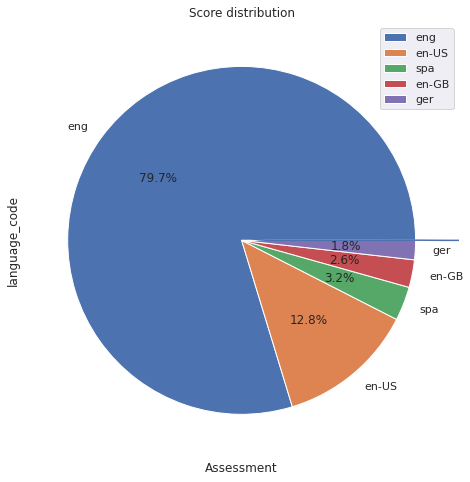

In [61]:
sns.kdeplot(df['average_rating'], shade=False)
plt.title('Score distribution')
plt.xlabel('Assessment')
plt.ylabel('Frequency')
df['language_code'].value_counts().head().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

#### Review of the ratings by books

/home/dmitriy/jupyter/environment/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


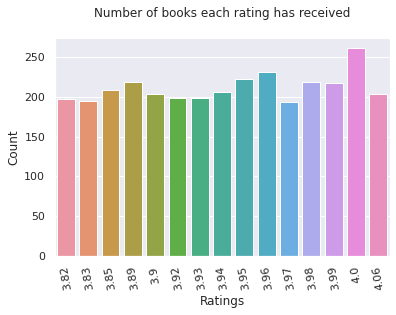

In [62]:
sns.barplot(df['average_rating'].value_counts().head(15).index, df['average_rating'].value_counts().head(15))
plt.title('Number of books each rating has received\n')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=100)
plt.show()

#### Review of the most popular and more rated books.

/home/dmitriy/jupyter/environment/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

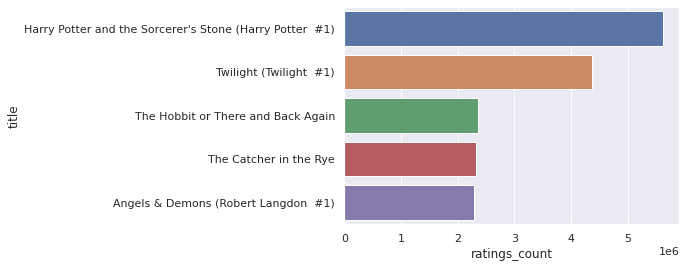

In [63]:
most_popular = df.nlargest(5, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(most_popular, most_popular.index)


/home/dmitriy/jupyter/environment/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

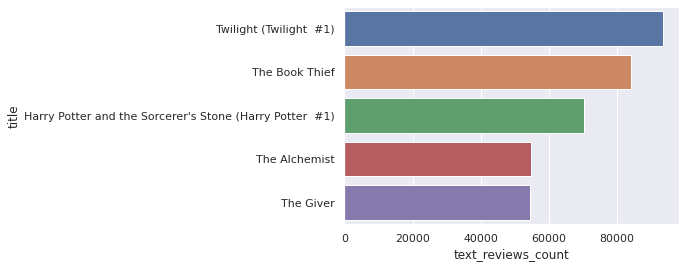

In [64]:
most_reviewed = df.nlargest(5, ['text_reviews_count'])
sns.barplot(most_reviewed['text_reviews_count'], most_reviewed['title'])

#### Top 5 books with less than 100 pages, and top 5 longest books.

/home/dmitriy/jupyter/environment/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


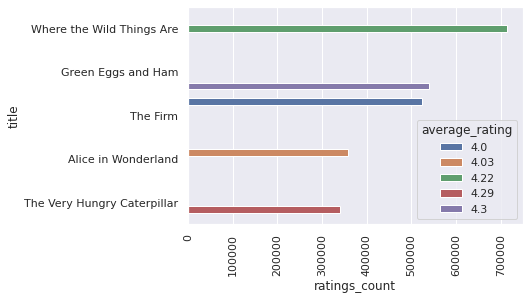

In [65]:
under2 = df[df['# num_pages'] <= 100]
top5 = under2.nlargest(5, ['ratings_count'])
sns.barplot(top5['ratings_count'], top5['title'], hue=top5['average_rating'])
plt.xticks(rotation=90)
plt.show()

/home/dmitriy/jupyter/environment/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='# num_pages', ylabel='title'>

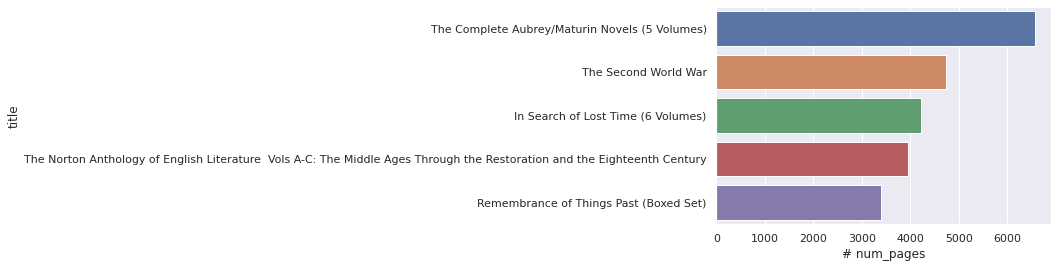

In [66]:
long_book = df.nlargest(5, ['# num_pages']).set_index('title')
sns.barplot(long_book['# num_pages'], long_book.index)

#### Review of the authors with best ratings and authors with more published books.

/home/dmitriy/jupyter/environment/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Total ratings')

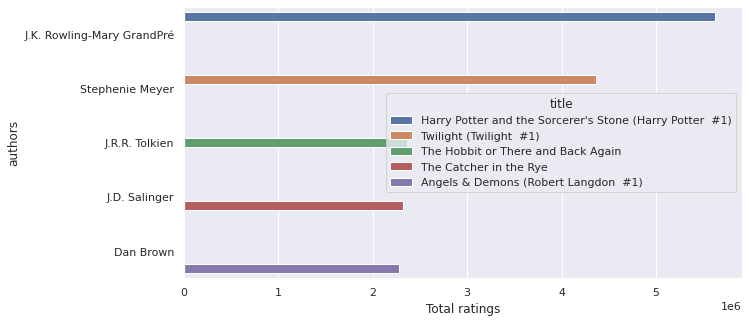

In [67]:
plt.figure(figsize=(10, 5))
autores = df.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(autores['ratings_count'], autores.index, ci = None, hue = autores['title'])
plt.xlabel('Total ratings')

/home/dmitriy/jupyter/environment/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '# publications')

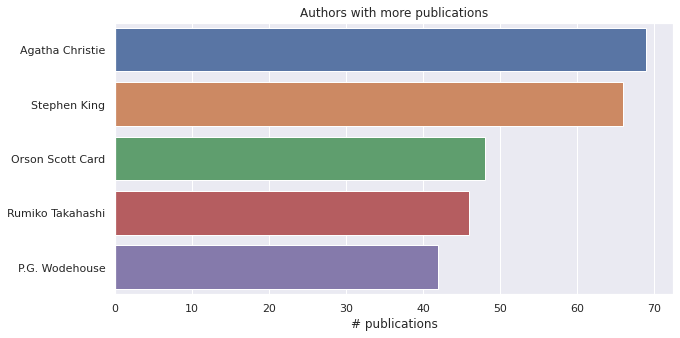

In [68]:
plt.figure(figsize=(10, 5))
topAutores = df['authors'].value_counts().head()
sns.barplot(topAutores, topAutores.index)
plt.title('Authors with more publications')
plt.xlabel('# publications')

#### plot a distribution between the rating and the number of pages.

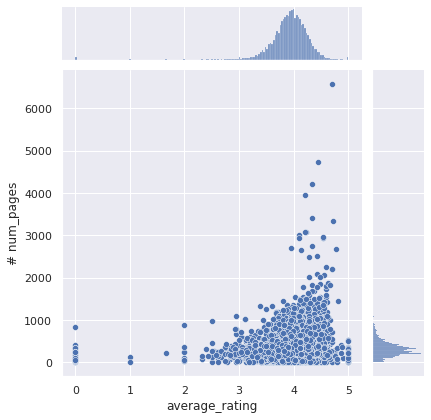

In [69]:
sns.jointplot(x = 'average_rating', y = '# num_pages', data = df)

#### Let’s see if there are any outliers and remove them.

<AxesSubplot:xlabel='# num_pages'>

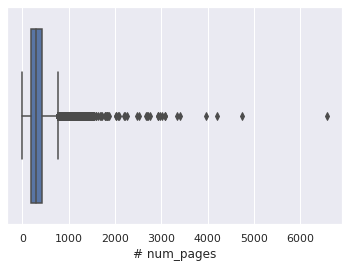

In [70]:
sns.boxplot(x=df['# num_pages'])

In [71]:
# As we see, any value further than 1,000 is an outlier and shall be removed, 
# also, we have to remove the outliers in the ratings and the text reviews.

In [72]:
df = df.drop(df.index[df['# num_pages'] >= 1000])

In [73]:
df = df.drop(df.index[df['ratings_count'] >= 1000000])

In [74]:
df = df.drop(df.index[df['text_reviews_count'] >= 20000])

#### normalize the labels and fit the label encoder.

In [75]:
le = preprocessing.LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['authors'] = le.fit_transform(df['authors'])

#### encode the data with the get_dummies function.

In [76]:
enc_lang = pd.get_dummies(df['language_code'])
df = pd.concat([df, enc_lang], axis=1)

#### Divide the data in attributes and labels

In [77]:
X = df.drop(['average_rating', 'language_code', 'isbn'], axis=1)
y = df['average_rating']

#### split the dataset for training and for validation, giving 20% for validation and 80% for training.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#### create the Linear Regression model and train it.

In [79]:
LR = LinearRegression()
LR.fit(X_train, y_train)
predict = LR.predict(X_test)

#### evaluate how accurate the predictions where

<AxesSubplot:>

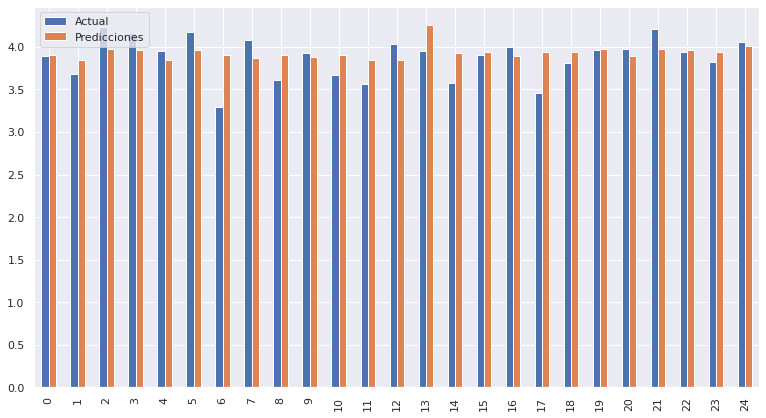

In [80]:
prd = pd.DataFrame({'Actual': y_test.tolist(), 'Predicciones': predict.tolist()}).head(25)
prd.head(10)
prd.plot(kind='bar', figsize=(13, 7))

In [ ]:
# As we see, the model was accurate and the predictions were close to the actual values. 
# To evaluate the model numerically, 
# we use the functions mean_absolute_error and the function mean_squared_error.

In [81]:
print('EAM:', metrics.mean_absolute_error(y_test, predict))
print('ECM:', metrics.mean_squared_error(y_test, predict))

EAM: 0.2233013485965948
ECM: 0.09825827723436284


In [ ]:
# The value for EAM was: 0.22 and 0.098 for the ECM, 
# meaning that our model was not so accurate but the predicted values were very close to the actual.